<a href="https://colab.research.google.com/github/Yasir-khan99/Animal-Image-Classification-using-CNN/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

... resuming from 222298112 bytes (920593582 bytes left) ...
100% 1.06G/1.06G [00:31<00:00, 31.2MB/s]
100% 1.06G/1.06G [00:31<00:00, 29.2MB/s]


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
	directory = '/content/train',
	labels = 'inferred',
	label_mode = 'int',
	batch_size=32,
	image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
	directory = '/content/test',
	labels = 'inferred',
	label_mode = 'int',
	batch_size = 32,
	image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
def process(image,label):
	image= tf.cast(image/255. ,tf.float32)
	return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2003 - accuracy: 0.5979 - val_loss: 0.5869 - val_accuracy: 0.7040
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5540 - accuracy: 0.7214 - val_loss: 0.5854 - val_accuracy: 0.6802
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4572 - accuracy: 0.7883 - val_loss: 0.4475 - val_accuracy: 0.7858
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3871 - accuracy: 0.8285 - val_loss: 0.5106 - val_accuracy: 0.7792
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3258 - accuracy: 0.8608 - val_loss: 0.6590 - val_accuracy: 0.7268
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2465 - accuracy: 0.8986 - val_loss: 0.5626 - val_accuracy: 0.7574
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1862 - accuracy: 0.9265 - val_loss: 0.5434 - val_ac

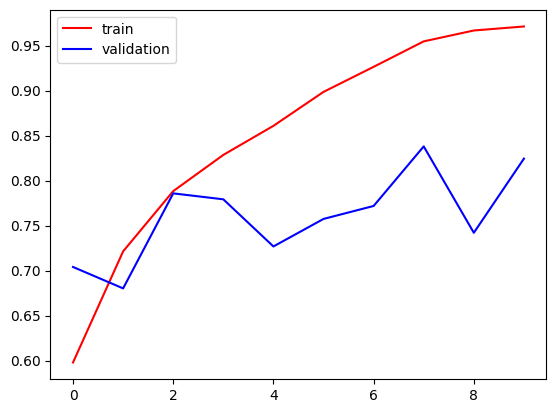

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [61]:
test_img = cv2.imread('/content/cat.jpeg')

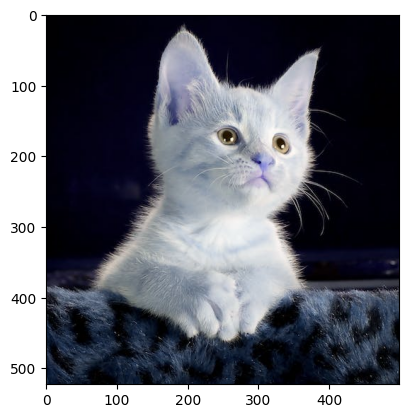

In [62]:
plt.imshow(test_img)

In [63]:
test_img.shape

(523, 500, 3)

In [64]:
test_img = cv2.resize(test_img,(256,256))

In [65]:
test_input = test_img.reshape((1,256,256,3))

In [66]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)